In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
import warnings
warnings.filterwarnings('ignore')

In [2]:
seed=42
data=pd.read_csv("D:\project complete 2\Synthetic_Financial_datasets_log.csv")
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
data=data.join(pd.get_dummies(data.type))
data.drop(['type'] , axis=1 , inplace=True)
data.drop(['nameOrig'] , axis=1 , inplace=True)
data.drop(['nameDest'] , axis=1 , inplace=True)

In [5]:
data0 = data[data.isFraud == 0]
data1 = data[data.isFraud == 1]

ops = ['CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER']


samples = []
for op in ops:
    
    group = data0[data0[op] == True]
    
    
    if len(group) < 1640:
        raise ValueError(
            f"Not enough rows for operation {op}: "
            f"found {len(group)}, need 1 640."
        )
    
    
    sampled = group.sample(n=1640, random_state=42)
    samples.append(sampled)


data0_downsampled = pd.concat(samples, ignore_index=True)


balanced_data = pd.concat([data0_downsampled, data1], ignore_index=True)


balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

In [6]:
print(balanced_data['isFraud'].value_counts())

isFraud
1    8213
0    8200
Name: count, dtype: int64


In [7]:
data=balanced_data

In [8]:
data.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,358,10358.27,10358.27,0.00,0.00,10358.27,1,0,False,True,False,False,False
1,44,145957.08,2136.00,0.00,2450486.53,2596443.61,0,0,False,True,False,False,False
2,694,10000000.00,18980853.88,8980853.88,0.00,0.00,1,0,False,False,False,False,True
3,182,306.09,181625.00,181318.91,0.00,0.00,0,0,False,False,False,True,False
4,331,32406.04,110042.00,77635.96,0.00,0.00,0,0,False,False,False,True,False


array([[<Axes: title={'center': 'step'}>,
        <Axes: title={'center': 'amount'}>,
        <Axes: title={'center': 'oldbalanceOrg'}>],
       [<Axes: title={'center': 'newbalanceOrig'}>,
        <Axes: title={'center': 'oldbalanceDest'}>,
        <Axes: title={'center': 'newbalanceDest'}>],
       [<Axes: title={'center': 'isFraud'}>,
        <Axes: title={'center': 'isFlaggedFraud'}>, <Axes: >]],
      dtype=object)

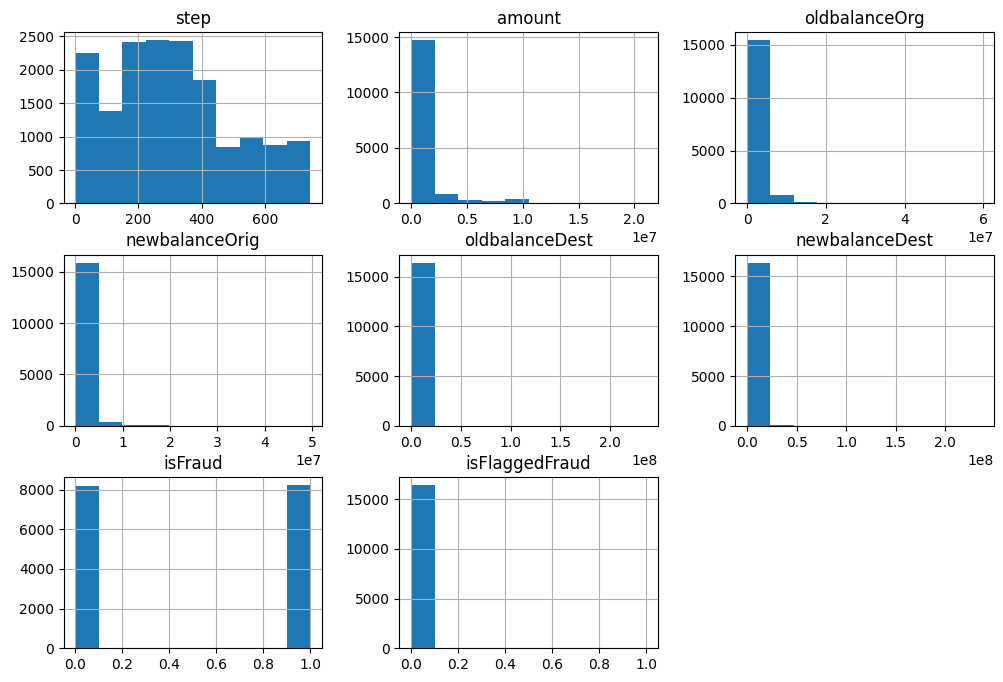

In [9]:
data.hist(figsize=(12,8))

In [10]:
data['amount']= np.log1p(data['amount'])  
data['oldbalanceOrg']= np.log1p(data['oldbalanceOrg']) 
data['newbalanceOrig']= np.log1p(data['newbalanceOrig'])  
data['oldbalanceDest']= np.log1p(data['oldbalanceDest'])  
data['newbalanceDest']= np.log1p(data['newbalanceDest'])  

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,358,9.245637,9.245637,0.000000,0.000000,9.245637,1,0,False,True,False,False,False
1,44,11.891075,7.667158,0.000000,14.711798,14.769654,0,0,False,True,False,False,False
2,694,16.118096,16.758941,16.010606,0.000000,0.000000,1,0,False,False,False,False,True
3,182,5.727141,12.109705,12.108018,0.000000,0.000000,0,0,False,False,False,True,False
4,331,10.386131,11.608626,11.259799,0.000000,0.000000,0,0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16408,273,15.335953,15.335953,0.000000,0.000000,15.335953,1,0,False,True,False,False,False
16409,336,12.231400,12.231400,0.000000,13.082707,13.438180,1,0,False,True,False,False,False
16410,304,10.099491,9.225328,0.000000,0.000000,0.000000,0,0,False,False,False,True,False
16411,302,11.280908,15.690330,15.702419,12.367569,11.956080,0,0,True,False,False,False,False


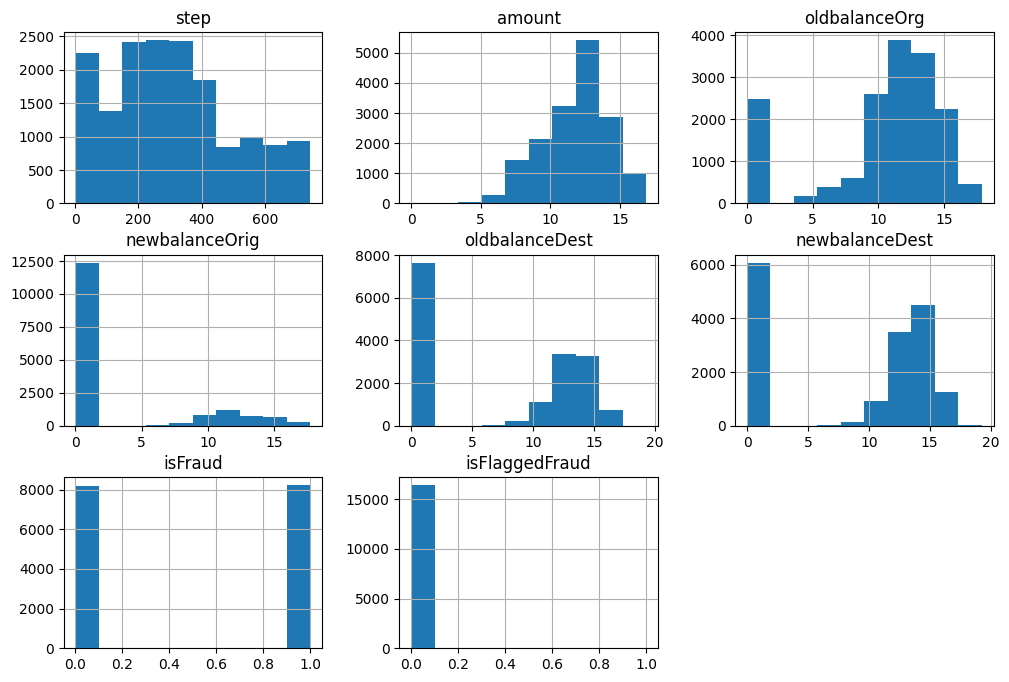

In [11]:
data.hist(figsize=(12,8))
data

<Axes: >

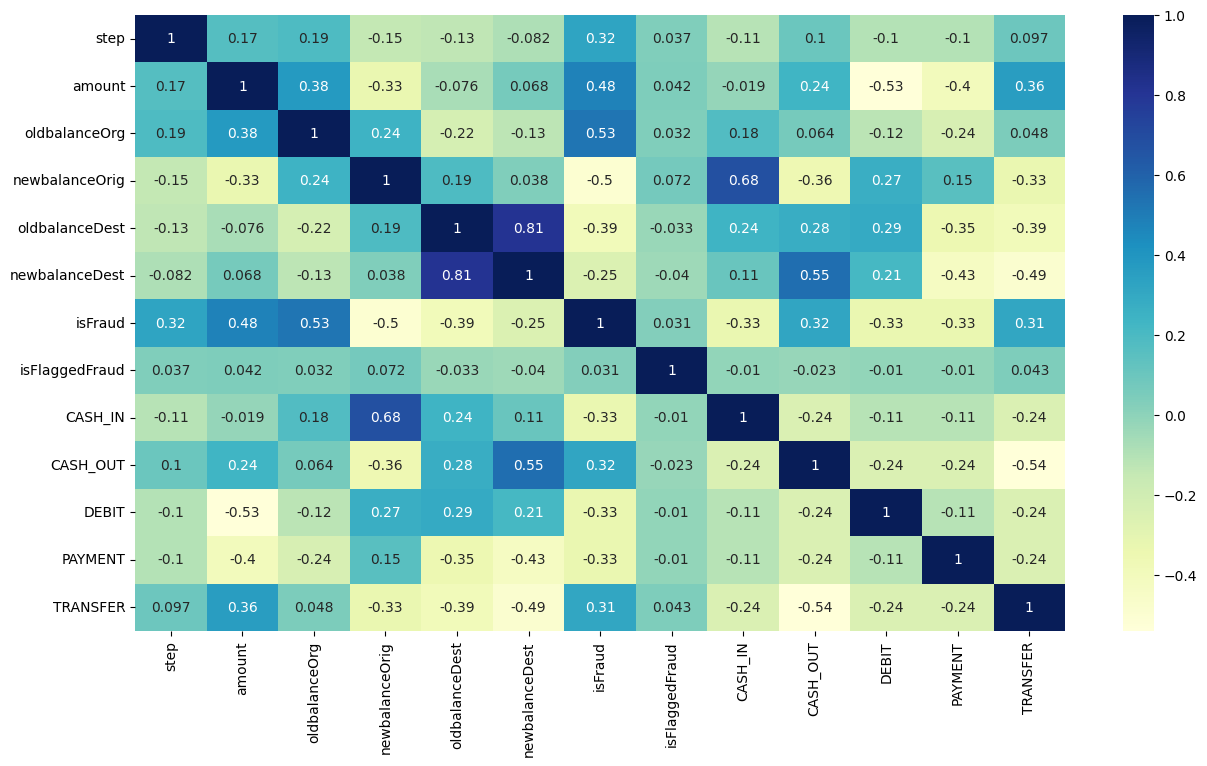

In [12]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")


In [13]:
x=data.drop(['isFraud'] , axis=1)
y=data['isFraud']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=seed)
x


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,358,9.245637,9.245637,0.000000,0.000000,9.245637,0,False,True,False,False,False
1,44,11.891075,7.667158,0.000000,14.711798,14.769654,0,False,True,False,False,False
2,694,16.118096,16.758941,16.010606,0.000000,0.000000,0,False,False,False,False,True
3,182,5.727141,12.109705,12.108018,0.000000,0.000000,0,False,False,False,True,False
4,331,10.386131,11.608626,11.259799,0.000000,0.000000,0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
16408,273,15.335953,15.335953,0.000000,0.000000,15.335953,0,False,True,False,False,False
16409,336,12.231400,12.231400,0.000000,13.082707,13.438180,0,False,True,False,False,False
16410,304,10.099491,9.225328,0.000000,0.000000,0.000000,0,False,False,False,True,False
16411,302,11.280908,15.690330,15.702419,12.367569,11.956080,0,True,False,False,False,False


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [16]:
model=LogisticRegression()

In [17]:
model.fit(x_train_scaled,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [18]:
model.score(x_test_scaled , y_test)

0.9802010356381359

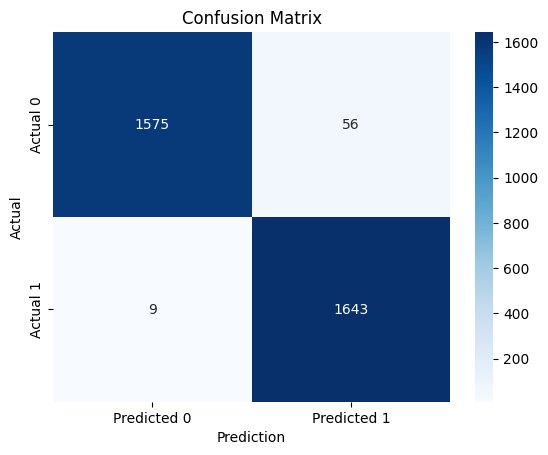

isFraud
1    8213
0    8200
Name: count, dtype: int64

In [19]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test_scaled)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
y.value_counts()

In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")

Precision: 0.9670
Recall:    0.9946
F1-score:  0.9806


In [21]:
import warnings
import os
warnings.filterwarnings("ignore")
os.environ["PYTHONWARNINGS"] = "ignore"

In [22]:
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(x_train_scaled, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [23]:
svm_model.score(x_test_scaled , y_test)

0.9902528175449284

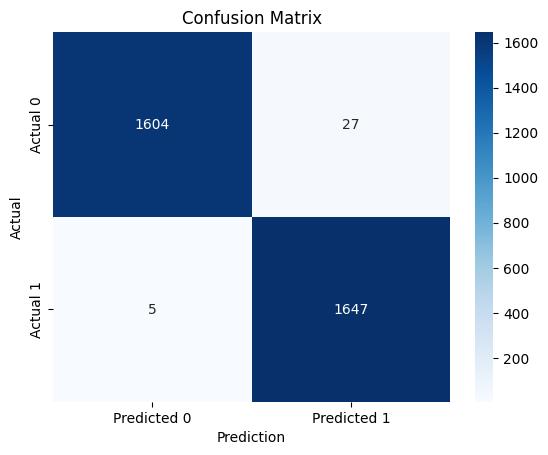

isFraud
1    8213
0    8200
Name: count, dtype: int64

In [24]:
from sklearn.metrics import confusion_matrix

y_pred = svm_model.predict(x_test_scaled)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
y.value_counts()

In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")

Precision: 0.9839
Recall:    0.9970
F1-score:  0.9904


In [26]:
from sklearn.model_selection import RandomizedSearchCV
param_distributions = {

    'C': [0.1, 1, 10, 100],             
    'kernel': ['linear', 'rbf', 'poly'], 
    'gamma': ['scale', 'auto', 0.01, 0.001],  
    'degree': [2, 3],                    

}

svm_model = SVC()

random_search = RandomizedSearchCV(
    estimator=svm_model,
    param_distributions=param_distributions,
    n_iter=50,       # Number of parameter settings sampled
    cv=5,             # 5-fold cross-validation
    verbose=0,
    random_state=42,
    n_jobs=-1,
    scoring='accuracy'  # or use 'f1', 'roc_auc', etc. depending on your task
) 
bestModel = random_search.fit(x_train_scaled , y_train)
bestModel.score(x_test_scaled , y_test)

0.9957356076759062

Accuracy: 0.9957356076759062
Precision: 0.9939686369119421
Recall: 0.9975786924939467
F1 Score: 0.9957703927492447


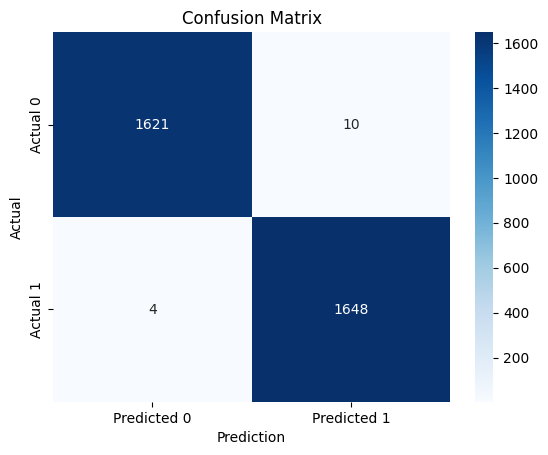

In [27]:
y_pred = bestModel.predict(x_test_scaled)

print("Accuracy:", bestModel.score(x_test_scaled, y_test))
print("Precision:", precision_score(y_test, y_pred, average='binary'))   
print("Recall:", recall_score(y_test, y_pred, average='binary'))
print("F1 Score:", f1_score(y_test, y_pred, average='binary'))


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [28]:
from sklearn.model_selection import GridSearchCV 
param_grid = {
    'C': [0.1, 1, 10, 100],             
    'kernel': ['linear', 'rbf', 'poly'], 
    'gamma': ['scale', 'auto', 0.01, 0.001],  
    'degree': [2, 3],                    
}

svm_model = SVC()

clf = GridSearchCV(
    estimator=svm_model,
    param_grid=param_grid,
    cv=3,
    verbose=0,
    n_jobs=-1,
    scoring='f1'  
)

best_svm = clf.fit(x_train_scaled, y_train)  
best_svm.score(x_test_scaled , y_test)

0.9957703927492447

In [29]:
from hyperopt import hp , fmin , tpe , STATUS_OK , Trials
space = { 
    'C': hp.choice('C', [0.1, 1, 10, 100]),
    'kernel': hp.choice('kernel', ['linear', 'rbf', 'poly']),
    'gamma': hp.choice('gamma', ['scale', 'auto', 0.01, 0.001]),
    'degree': hp.choice('degree', [2, 3]) }

In [30]:
def objective(space): 
    model = SVC(
        C=space['C'],
        kernel=space['kernel'],
        gamma=space['gamma'],
        degree=space['degree']
    )
    
    accuracy = cross_val_score(model, x_train_scaled, y_train, cv=5).mean()
    
    return {'loss': -accuracy, 'status': STATUS_OK}

In [31]:
from sklearn.model_selection import cross_val_score
trials = Trials()
best = fmin(fn=objective, 
            space=space, 
            algo=tpe.suggest, 
            max_evals=80, 
            trials=trials)

100%|███████████████████████████████████████████████| 80/80 [21:16<00:00, 15.95s/trial, best loss: -0.9951256664127952]
